In [81]:
#import numpy as np 
import pandas as pd
from sklearn.cross_validation import train_test_split

from sklearn import preprocessing
Encode = preprocessing.LabelEncoder()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn import metrics



from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB

import seaborn as sns
import matplotlib.pyplot as plt


In [82]:
Data = pd.read_csv("C:/Users/user/Desktop/S/2000test.csv",usecols=['Tweets','Polarity'],encoding='utf-8')

In [83]:
import re
def process_tweet(Tweets):
    return " ".join(re.sub("\@+\w+|\.", "",Tweets.lower()).split())

In [84]:
Data['Tweets'] = Data['Tweets'].apply(lambda x:process_tweet(x))

In [85]:

#chatbot_df = pd.read_csv("C:/Users/user/Desktop/S/2000test.csv",usecols=['Tweets','Polarity'],encoding='utf-8')
Data['Polarity'] = Encode.fit_transform(Data['Polarity'])
x_train,x_test,y_train,y_test = train_test_split(Data["Tweets"],
                                                 Data['Polarity'],
                                                 test_size=0.2,
                                                 random_state=1)

In [86]:
result_cols = ["Classifier", "Accuracy"]
result_frame = pd.DataFrame(columns=result_cols)

In [87]:
classifiers = [
    
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    AdaBoostClassifier(),
    MultinomialNB()]


In [88]:
for clf in classifiers:
    name = clf.__class__.__name__
    text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),('clf', clf),])
    text_clf.fit(x_train, y_train)
    predicted = text_clf.predict(x_test)
    acc = metrics.accuracy_score(y_test,predicted)
    print (name+' accuracy = '+str(acc*100)+'%')
    acc_field = pd.DataFrame([[name, acc*100]], columns=result_cols)
    result_frame = result_frame.append(acc_field)

SVC accuracy = 54.75%
DecisionTreeClassifier accuracy = 68.0%
AdaBoostClassifier accuracy = 73.0%
MultinomialNB accuracy = 73.0%


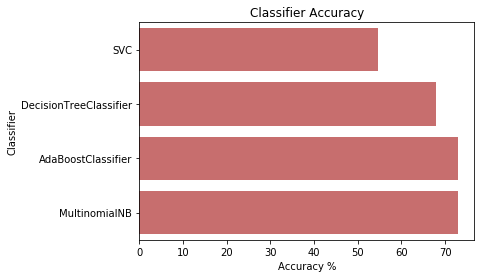

In [89]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=result_frame, color="r")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()